## Tentang Dataset

Ionosfer merupakan bagian dari atmosfer bumi yang terionisasi, berada pada ketinggian 80 - 100 Km di atas permukaan bumi. Tugas kita adalah untuk membedakan jenis pengembalian radar, tujuannya adalah untuk memahami apakah pada saat pengembalian radar ionosfer memiliki struktur elektron yang bermakna atau tidak. Proses pada penelitian ini dibagi menjadi 3 macam:


1.   Exploratory data analysis
2.   Preprocessing
3.   Klasifikasi dengan SLP



Data radar ini dikumpulkan oleh sebuah sistem di Goose Bay, Labrador. Sistem ini terdiri dari susunan bertahap dari 16 antena frekuensi tinggi dengan total daya yang dipancarkan sekitar 6,4 kilowatt. Label atau target dari data ini adalah elektron bebas di Ionosfer yaitu "Good" dan "Bad".
sedangkan

*   Good menunjukan bahwa terdapat suatu struktur elektron di lapisan Ionosfer
*   Bad menunjukan bahwa tidak ada struktur elektron di Ionosfer.

Extreme UltraViolet (EUV) dan radiasi matahari sinar-x mengionisasi atom dan molekul di dalam Ionosfer sehingga menciptakan lapisan atau struktur elektron. Disini Ionosfer memiliki peranan untuk memantulkan dan memodifikasi gelombang radio yang digunakan untuk komunikasi dan navigasi.

Radar beroperasi dengan mentransmisikan pola multipulsa ke ionosfer. Kemudian Sinyal yang diterima diproses menggunakan fungsi autokorelasi yang argumennya adalah waktu pulsa dan nomor pulsa. Ada 17 nomor pulsa untuk sistem Goose Bay. Instance dalam kumpulan data ini dijelaskan oleh 2 atribut per nomor pulsa, sesuai dengan nilai kompleks yang dikembalikan oleh fungsi yang dihasilkan dari sinyal elektromagnetik kompleks

Sumber dataset : https://archive.ics.uci.edu/dataset/52/ionosphere

## 2. Explanatory Data Analysis


### 2.1 Informasi Attribute

Dataset ini memiliki total data sebanyak 351 yang berisi nilai-nilai pengembalian radar. Setiap pengembalian akan menghasilkan 17 pasang (34 buah) bilangan kompleks. Semua nilai pada attribut ini bersifat kontinu dan tidak memiliki missing value di dalamnya. Pada label Good akan mengembalikan nilai 1 dan Bad akan mengembalikan nilai 0



---



## Import Library

In [ ]:
!pip install ann_visualizer
!pip install pdf2image
!apt-get install poppler-utils

In [ ]:
# Library untuk setup data
import numpy as np
import pandas as pd
import random
import math

# Library untuk preprocessing
from sklearn.decomposition import PCA
from imblearn.over_sampling import SVMSMOTE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Library untuk proses machine learning
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.callbacks import LearningRateScheduler

# Library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt
from pdf2image import convert_from_path
from ann_visualizer.visualize import ann_viz
from IPython.display import display, Image

## Import Data

In [ ]:
dataset = pd.read_csv("/content/ionosphere.csv")
dataset = dataset.rename(columns={'coloum_ai': 'target'})

In [ ]:
dataset['target'] = dataset.target.astype('category')
encoding = {'g': 1, 'b': 0}
dataset.target.replace(encoding, inplace=True)

## Statistical Overview
Untuk lebih memahami skala dari setiap feature yang ada, hal ini penting karena ini merupakan building block yang nantinya akan dipakai ketika proses preprocessing

In [ ]:
dataset.drop("target", axis = 1).describe().T

,count,mean,std,min,25%,50%,75%,max
coloum_a,351.0,0.891738,0.311155,0.0,1.000000,1.00000,1.000000,1.0
coloum_b,351.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0
coloum_c,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
coloum_d,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
coloum_e,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
coloum_f,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
coloum_g,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
coloum_h,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
coloum_i,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
coloum_j,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0


In [ ]:
dataset.drop("coloum_b", axis = 1)

,coloum_a,coloum_c,coloum_d,coloum_e,coloum_f,coloum_g,coloum_h,coloum_i,coloum_j,coloum_k,...,coloum_z,coloum_aa,coloum_ab,coloum_ac,coloum_ad,coloum_ae,coloum_af,coloum_ag,coloum_ah,target
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,...,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,1
347,1,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,...,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,1
348,1,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,...,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,1
349,1,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,...,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,1


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWar

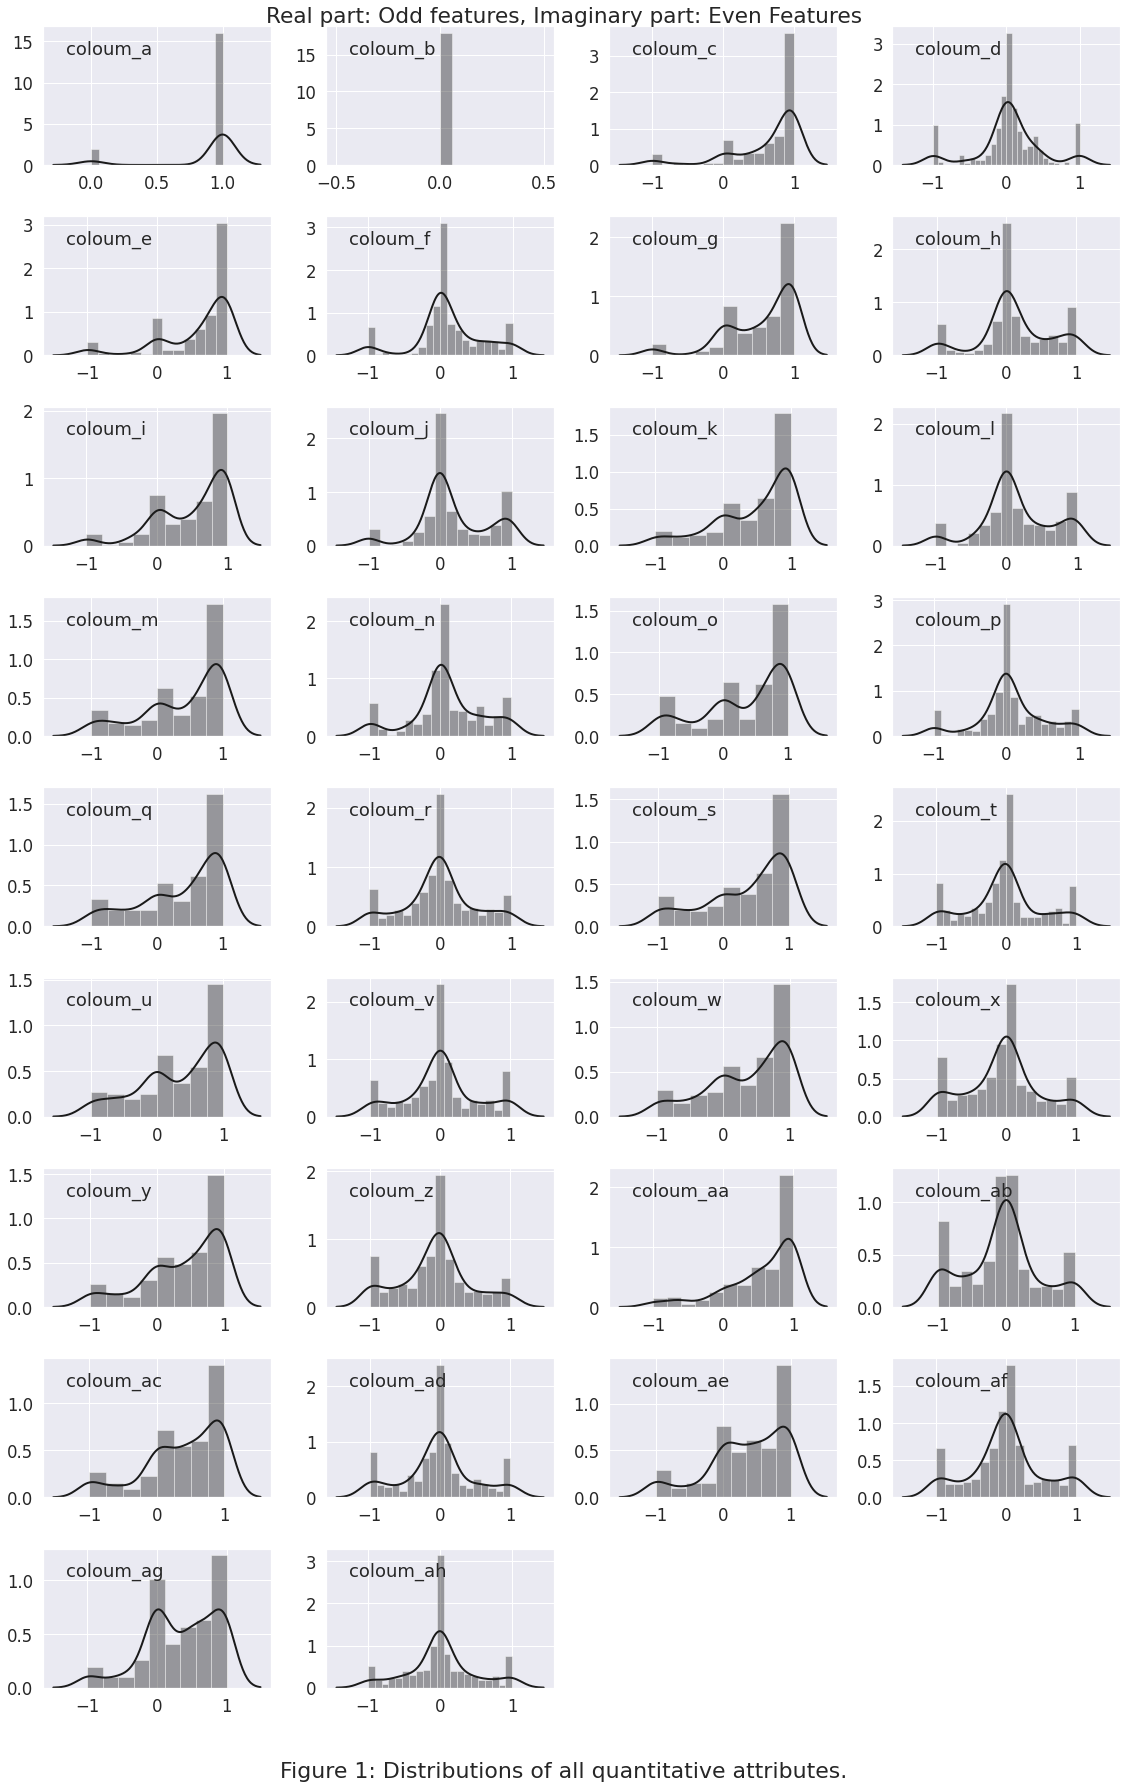

In [ ]:
sns.set_style("whitegrid")

num_cols = dataset.select_dtypes(include= ['Float64', 'int64']).columns
sns.set(font_scale=1.5)
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(16,24))
fig.delaxes(axes[8,2])
fig.delaxes(axes[8,3])

for ax, feats in zip(axes.flatten(), num_cols):
    fig = sns.distplot(a=dataset[feats], ax=ax, kde_kws={"lw":2}, color="k")
    ax.set_ylabel("")
    ax.text(0.1,0.8, ax.xaxis.get_label().get_text(), transform=ax.transAxes)
    ax.set_xlabel("")

plt.figtext(0.5,-0.025,"Figure 1: Distributions of all quantitative attributes.", fontsize = 22, ha = 'center')
plt.gcf().suptitle("Real part: Odd features, Imaginary part: Even Features", y = 1)
plt.tight_layout()
plt.show()

## 2.2 Label information

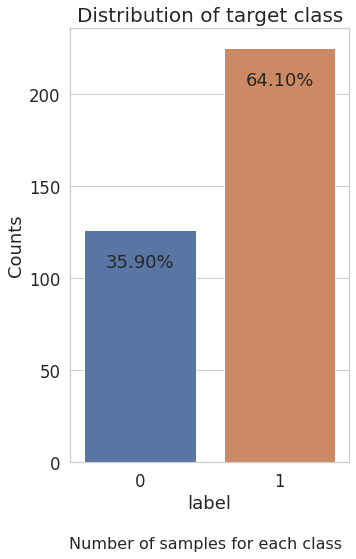

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (5,8))
ax = sns.countplot(x='target',data=dataset, dodge = False)

bars = ax.patches
half = int(len(bars)/2)
left_bars = bars[:half]
right_bars = bars[half:]

for left, right in zip(left_bars, right_bars):
    height_l = left.get_height()
    height_r = right.get_height()
    total = height_l + height_r

    ax.text(left.get_x() + left.get_width()/2.,
            height_l -20, '{0:.2%}'.format(height_l/total), ha="center", fontsize = 18)
    ax.text(right.get_x() + right.get_width()/2.,
            height_r -20, '{0:.2%}'.format(height_r/total), ha="center", fontsize = 18)


plt.xlabel("label")
plt.ylabel("Counts")
plt.title("Distribution of target class", fontsize = 20)
plt.figtext(0.5,-0.025,"Number of samples for each class", fontsize = 16, ha = 'center')
plt.show()

## 2.3 Feature Correlation

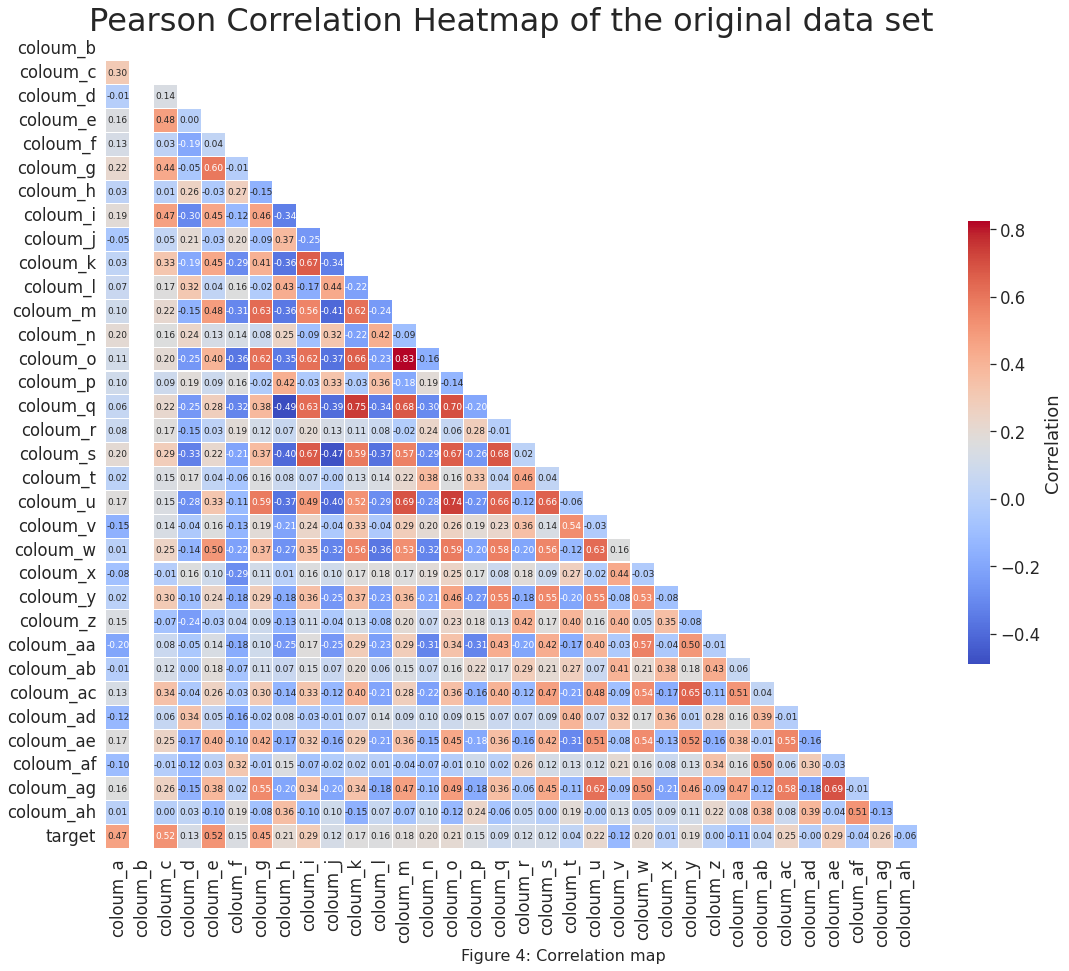

In [ ]:
sns.set_style("white")
corr_df = dataset.corr()
mask = np.triu(corr_df)
mask = mask[1:, :-1]
corr_df = corr_df.iloc[1:,:-1].copy()

f,ax=plt.subplots(figsize=(16,14))
fig = sns.heatmap(corr_df,annot=True,fmt=".2f", ax=ax,
                  linecolor="white", linewidths=0.1 ,
                  mask = mask, square=True,
                  annot_kws={"size": 9}, cbar_kws = {"shrink":0.5, 'label': 'Correlation'},
                  cmap= 'coolwarm', rasterized=False)

plt.xticks(rotation= 90, ha = 'center')
plt.yticks(rotation= 0)

plt.title('Pearson Correlation Heatmap of the original data set', fontdict= {"fontsize":32})
plt.figtext(0.5,0.02, "Figure 4: Correlation map", fontsize = 16, ha = 'center')
plt.tight_layout()
plt.show()

In [ ]:
dataset.head()

,coloum_a,coloum_b,coloum_c,coloum_d,coloum_e,coloum_f,coloum_g,coloum_h,coloum_i,coloum_j,...,coloum_z,coloum_aa,coloum_ab,coloum_ac,coloum_ad,coloum_ae,coloum_af,coloum_ag,coloum_ah,target
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1


In [ ]:
dataset.shape

(351, 35)

## 3. Preprocessing

Preprocessing terdiri dari beberapa tahap seperti:


1.   Split data
2.   Feature scaling
3.   Dimensional Reduction



## Pembagian dataset

In [ ]:
X = dataset.values[:, :-1]
y = dataset.values[:, -1]

## Feature Scaling

In [ ]:
# Apply StandardScaler
mm = MinMaxScaler()
X = mm.fit_transform(X)

In [ ]:
X = pd.DataFrame(X)

In [ ]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,1.0,0.0,0.997695,0.470555,0.926215,0.511530,0.91699,0.311460,1.000000,0.518800,...,0.784055,0.244145,0.705390,0.269160,0.606330,0.329550,0.711335,0.227565,0.593205,0.273500
1,1.0,0.0,1.000000,0.405855,0.965175,0.319220,0.44566,0.032015,1.000000,0.477255,...,0.398340,0.367155,0.397660,0.407995,0.404800,0.442035,0.416870,0.468560,0.431310,0.487765
2,1.0,0.0,1.000000,0.483175,1.000000,0.502425,1.00000,0.439690,0.944825,0.505990,...,0.787640,0.298900,0.794920,0.389275,0.715500,0.413175,0.802180,0.379100,0.780225,0.308810
3,1.0,0.0,1.000000,0.274195,1.000000,1.000000,0.85608,0.000000,0.500000,0.500000,...,1.000000,0.953475,0.758065,1.000000,1.000000,0.399505,0.628410,1.000000,0.338090,1.000000
4,1.0,0.0,1.000000,0.487995,0.970700,0.532655,0.96053,0.383725,0.885760,0.418005,...,0.516430,0.174210,0.566450,0.233970,0.512155,0.189015,0.471465,0.202135,0.476960,0.171515


## Fungsi untuk mereduksi jumlah attribut

In [ ]:
def Reduce_attribute(data, dimension):
  # Create principal components
  pca = PCA(n_components=dimension)
  X_pca = pca.fit_transform(data)

  # Convert to dataframe
  component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
  X_pca = pd.DataFrame(X_pca, columns=component_names)

  return X_pca

## Fungsi untuk mempersiapkan data seperti:

*   Split data
*   Mengatur random seed
*   Meninisialisasi bobot dan bias
*   Mengatur random seed



In [ ]:
from imblearn.over_sampling import ADASYN
def Setup_data(X, y, seed):
  # bisa divariasikan
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.43, random_state=seed)
  tf.random.set_seed(seed)

  # bisa divariasikan
  # yang diubah seednya seed(x)
  random_w = np.random.seed(seed)
  random_w = np.random.rand(x_train.shape[1],1)
  bias = np.ones(1)

  return [x_train, x_test, y_train, y_test, random_w, bias]

## Fungsi unutk membangun arsitektur model dan mengaplikasikan bobot & bias awal

In [ ]:
def Build_model(neurons, weight, bias, activation):
  model = Sequential()

  # bisa divariasikan
  model.add(Dense(1, input_dim=neurons, activation=activation))
  model.layers[0].set_weights([weight,bias])

  return model

## Fungsi untuk melatih dan mentest model

In [ ]:
  def TrainTest_model(x_train, x_test, y_train, y_test, loss, optimizers, metrics, model,callbacks_list, epoch):
    model.compile(loss=loss, optimizer=optimizers, metrics=metrics)
    history = model.fit(x_train,
                        y_train, epochs=epoch,
                        batch_size=1,
                        callbacks=callbacks_list,
                        shuffle=False,
                        verbose=0)

    score, acc = model.evaluate(x_test, y_test, verbose=0)
    return model, history, acc

## Main proses

In [ ]:
class MainProgram:
  def __init__(self,X,dimension_pca,y,seed,activation,loss,optimizers,metrics,epoch, lr):

    self.index = 1

    self.X = X
    self.dimension_pca = dimension_pca
    self.y = y
    self.seed = seed
    self.activation = activation
    self.loss = loss
    self.optimizers = optimizers
    self.metrics = metrics
    self.epoch = epoch

    self.initial_lrate = lr

    # dimensional reduction
    self.ra = Reduce_attribute(data=X, dimension=dimension_pca)

    # split
    self.sd = Setup_data(X=self.ra, y=y, seed=seed)

    self.bm = Build_model(neurons=self.sd[0].shape[1],
                    weight=self.sd[4],
                    bias=self.sd[5],
                    activation=activation)

    self.callbacks_list = [LearningRateScheduler(self.step_decay)]

    self.tm = TrainTest_model(x_train=self.sd[0],
                        x_test=self.sd[1],
                        y_train=self.sd[2],
                        y_test=self.sd[3],
                        loss=self.loss, optimizers=self.optimizers,
                        metrics=[self.metrics],
                        model=self.bm,
                        callbacks_list=self.callbacks_list,
                        epoch=epoch)

    # self.summary = self.bm.summary()

    self.train_acc = self.tm[1].history['accuracy'][epoch-1]
    self.test_acc = self.tm[2]

    print("Training accuracy :", self.train_acc)
    print("Testing accuracy  :", self.test_acc)
    # print(self.index)

  def step_decay(self,epoch):
    initial_lrate = self.initial_lrate
    drop = 0.8
    epochs_drop = 1
    index = self.index

    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    if self.index == self.epoch:
      print(f"learning rate awal : {self.initial_lrate}")
      print(f"learning rate akhir : {lrate}")
    self.index += 1
    return lrate

## PERCOBAAN

In [ ]:
percobaan_1 = MainProgram(X,34,y,1,"tanh","binary_crossentropy","RMSprop","accuracy",35,0.25)

learning rate awal : 0.25
learning rate akhir : 0.00010141204801825854
Training accuracy : 0.9300000071525574
Testing accuracy  : 0.8344370722770691


In [ ]:
percobaan_2 = MainProgram(X,34,y,1,"tanh","binary_crossentropy","adam","accuracy",25,0.1)

learning rate awal : 0.1
learning rate akhir : 0.0003777893186295722
Training accuracy : 0.9449999928474426
Testing accuracy  : 0.940397322177887


In [ ]:
percobaan_1.bm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 35        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


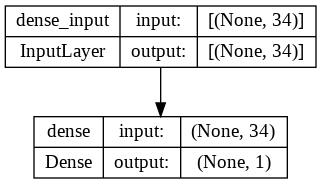

In [ ]:
tf.keras.utils.plot_model(percobaan_1.bm, to_file="my_model.png", show_shapes=True)

In [ ]:
neurons_list = [10,20,34]
seed_list = [1,50,70]
activation_list = ["sigmoid","tanh","linear"]
optimizer_list = ["adam","RMSprop"]
learning_rate_list = [0.1, 0.21, 0.03, 0.5]


index = 1
list_percobaan = []

for neurons in neurons_list:
  for seed in seed_list:
    for activation in activation_list:
      for optimizer in optimizer_list:
        for learning_rate in learning_rate_list:
          print("---------------------------------------------------")
          print(f"Percobaan ke-{index} dengan neurons = {neurons}")
          print(f"Percobaan ke-{index} dengan seed = {seed}")
          print(f"Percobaan ke-{index} dengan activation = {activation}")
          print(f"Percobaan ke-{index} dengan optimizer = {optimizer}")
          print(f"Percobaan ke-{index} dengan learning_rate = {learning_rate}")
          print("---------------------------------------------------")
          percobaan_x = MainProgram(X,neurons,y,seed,activation,"binary_crossentropy",optimizer,"accuracy",25,learning_rate)
          list_percobaan.append(percobaan_x)
          print("\n")
          index += 1
  print("\n")

---------------------------------------------------
Percobaan ke-1 dengan neurons = 10
Percobaan ke-1 dengan seed = 1
Percobaan ke-1 dengan activation = sigmoid
Percobaan ke-1 dengan optimizer = adam
Percobaan ke-1 dengan learning_rate = 0.1
---------------------------------------------------
learning rate awal : 0.1
learning rate akhir : 0.0003777893186295722
Training accuracy : 0.8949999809265137
Testing accuracy  : 0.8940397500991821


---------------------------------------------------
Percobaan ke-2 dengan neurons = 10
Percobaan ke-2 dengan seed = 1
Percobaan ke-2 dengan activation = sigmoid
Percobaan ke-2 dengan optimizer = adam
Percobaan ke-2 dengan learning_rate = 0.21
---------------------------------------------------
learning rate awal : 0.21
learning rate akhir : 0.0007933575691221015
Training accuracy : 0.8949999809265137
Testing accuracy  : 0.8940397500991821


---------------------------------------------------
Percobaan ke-3 dengan neurons = 10
Percobaan ke-3 dengan see

In [ ]:
# 153
print(len(list_percobaan))

216


## Memvisualisasikan arsitektur Single Layer Perceptron

In [ ]:
ann_viz(percobaan_1.bm, view=True, filename="construct_model", title="Single Layer Perceptron")

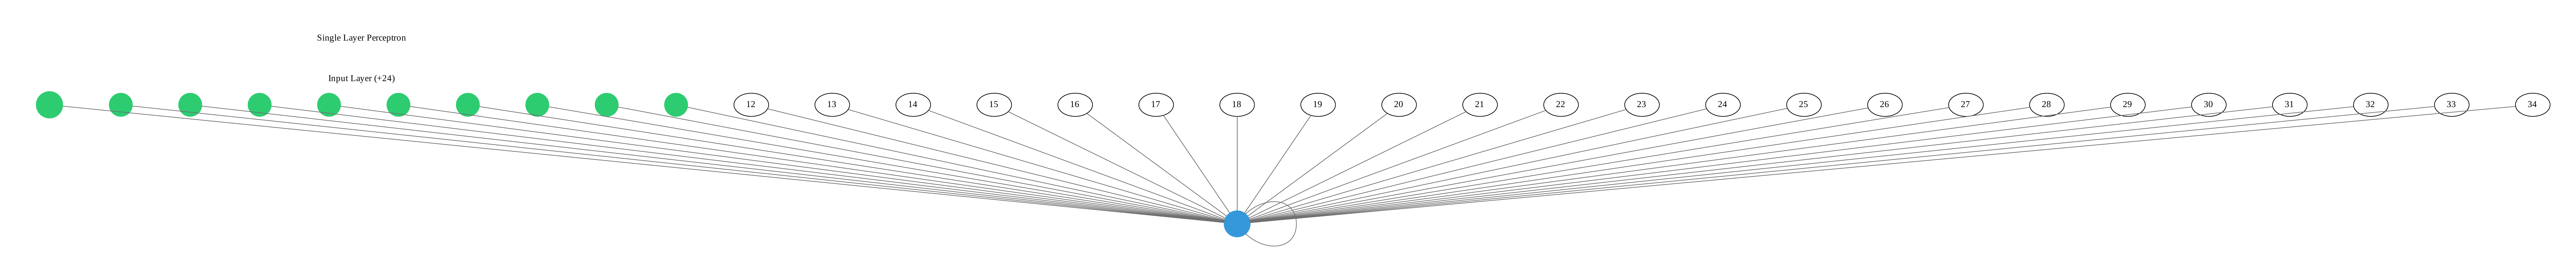

In [ ]:
images = convert_from_path("/content/construct_model.pdf")
for i, image in enumerate(images):
    fname = "image" + str(i) + ".png"
    image.save(fname, "PNG")
Image("image0.png", width=2000, height=700)